### Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).  
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

## Шаг. Изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st


In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


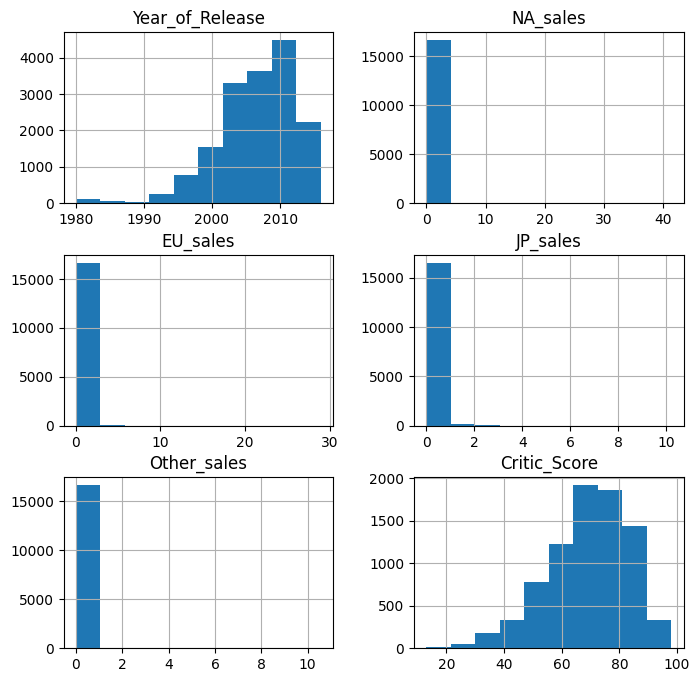

In [6]:
data.hist(figsize=(8,8));

 *Вывод по шагу:*  
Объемная база данных на 16 тыс строк и 11 колонн. В базе присутствуют типы строк float64 и object.

## ШАГ. Подготовка данных


In [7]:
# через цикл приведем название столбоцв в нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

Изменять тип данных столбца year_of_release не будем, так как там только год.  

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Избавимся от пропусков в данных.

В name и genre удалим строки с пропуском, так как их всего 2

In [10]:
data = data.dropna(subset=['name','genre'])
data.reset_index(drop=True, inplace=True)

Пропуски в user_score заменим аббревиатурой 'tbd'(to be determined),так как эта аббревиатура уже используется в этом столбце.

In [11]:
data['user_score'] = data['user_score'].fillna('tbd')

В rating и critical_score заменим пропуски на -1, слишком много данных потеряем если удалим строки с пропусками. 

In [12]:
data['rating'] = data['rating'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)

In [13]:
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

В year_of_release пропуски обозначены NaT, что вполне устраивает нас и не повлияет на исследование.

In [14]:
data['critic_score'] = data['critic_score'].astype('int64') # после заполнения пропусков изменим тип на инт, так как в 
#столбце целые числа

Суммарные продажи по регионам.

In [15]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,tbd,-1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,tbd,-1
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,tbd,-1
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1,tbd,-1
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,tbd,-1
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1,tbd,-1


Посчитаем суммарные продажи во всех регионах. 

In [16]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


*Вывод по шагу:*  
На этом этапе мы закончили подготовку данных к ИА, мы убрали пропуски и добавили доп. колонну со всеми продажами.

## Шаг. Проведем исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

In [17]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

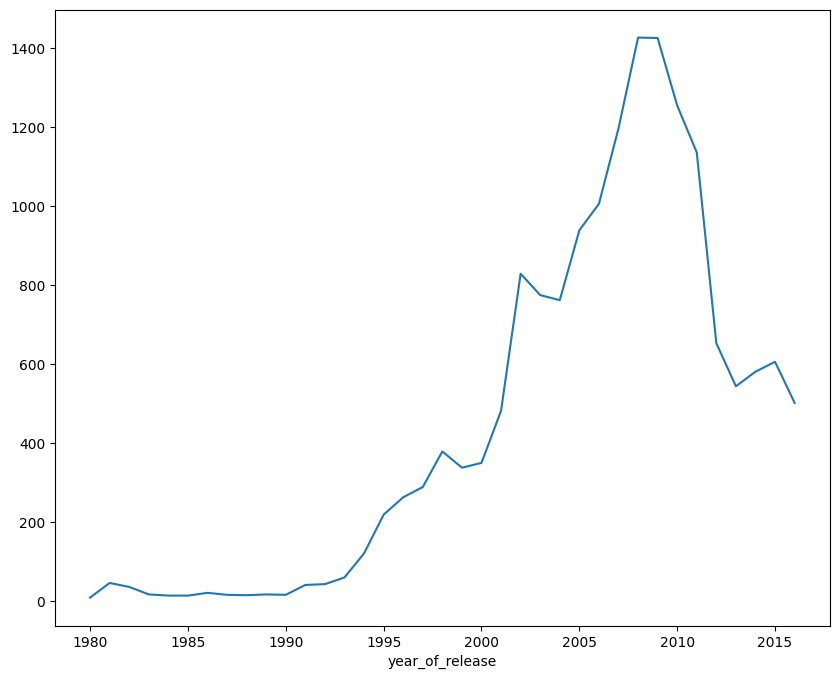

In [18]:
data.groupby('year_of_release')['name'].count().plot(figsize=(10,8));

Рост выхода игр начал расти после 1990 и достиг пика к 2007 году, спад на графике скорее всего обусловлен кризисом 2008 года. 

In [19]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

 Выберим платформы с наибольшими суммарными продажами и построим распределение по годам.   
PS2     1255.77  
X360     971.42  
PS3      939.65  
Wii      907.51  
DS       806.12  
PS       730.86  

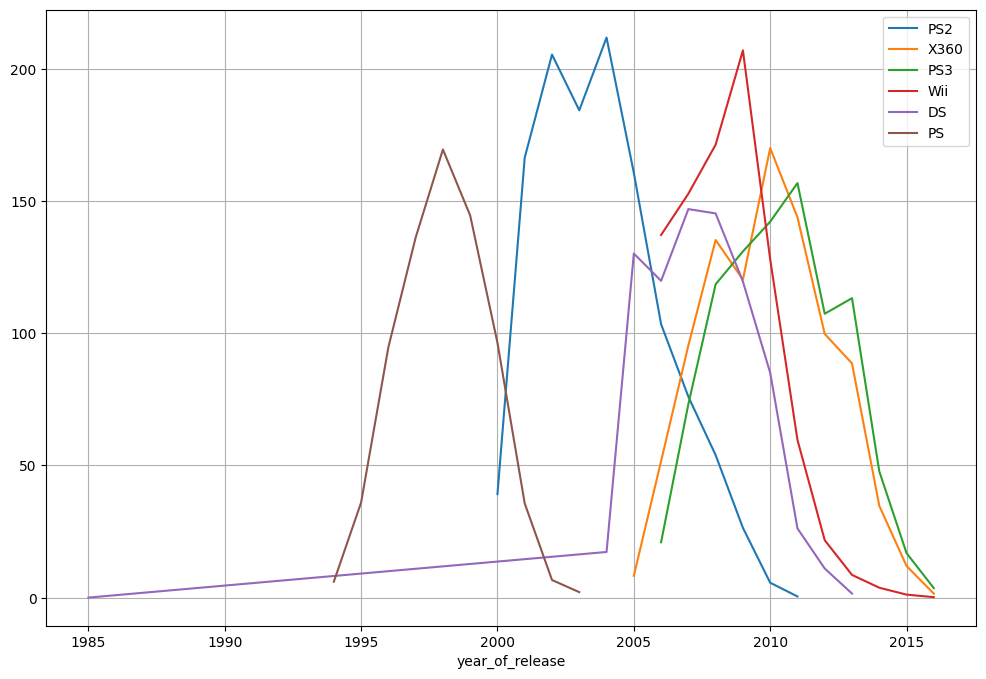

In [20]:
top_platform = data.pivot_table(index='platform', values ='all_sales', aggfunc='sum').sort_values('all_sales', ascending = False).head(6).index
for platform in top_platform:
    data_tmp = data.loc[data['platform']== platform].pivot_table(index='year_of_release', values ='all_sales', aggfunc='sum')
    data_tmp = data_tmp.rename(columns = {'all_sales': platform})
    data_tmp[platform].plot(legend=True, grid=True, figsize=(12, 8))
#Преподователь по проекту помог написать цикл. Можно ли сделать этот график без использования цикла?   

Примерно цикл жизни платформы длится 10 лет. Новые платформы появлются каждые 5 лет. Исключение PC, он будет жить ещё долго. 

In [21]:
# За актуальный период возьмем данные с 10 года, метод copy()  используем чтобы создать новую переменную, а не ссылатьсяя на старую
data_slice = data[data['year_of_release'] >= 2010].copy()

In [22]:
data_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   float64
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     5277 non-null   int64  
 9   user_score       5277 non-null   object 
 10  rating           5277 non-null   object 
 11  all_sales        5277 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 535.9+ KB


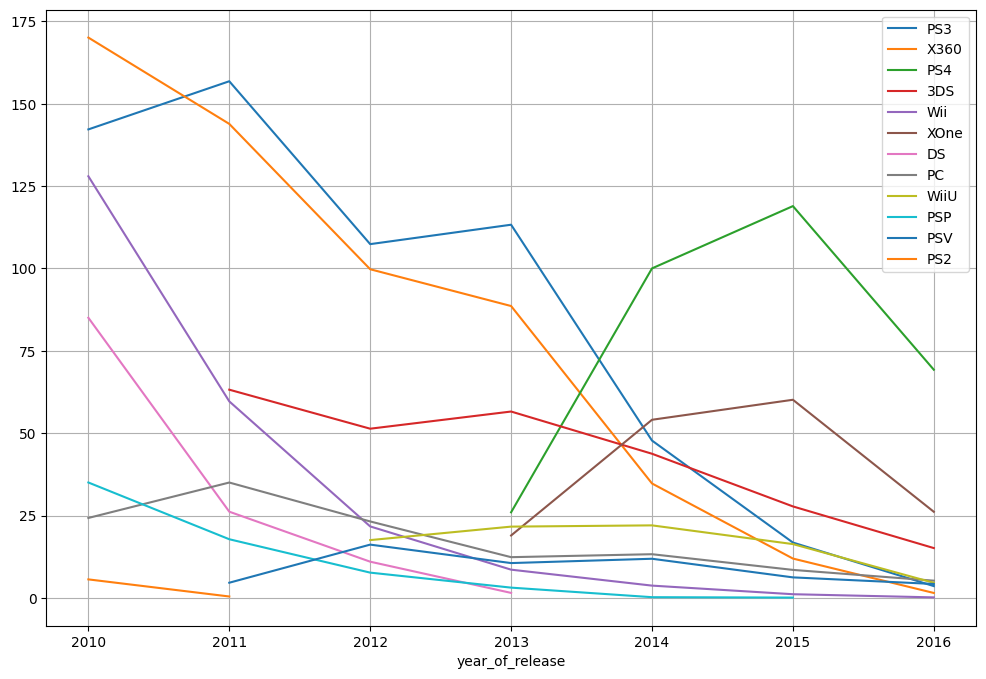

In [23]:
newtop_platform = data_slice.pivot_table(index='platform', values ='all_sales', aggfunc='sum').sort_values('all_sales', ascending = False).index
for platform in newtop_platform:
    data_tmp = data_slice.loc[data['platform']== platform].pivot_table(index='year_of_release', values ='all_sales', aggfunc='sum')
    data_tmp = data_tmp.rename(columns = {'all_sales': platform})
    data_tmp[platform].plot(legend=True, grid=True, figsize=(12, 8))

В 2013 году появились новые платформы ( PS4 и XOne), они сразу заняли топ по продажам, но к 2016 году все платформы показали снижение продаж.  
Потенциально прибыльным решением будет:  
1)PS4 и XOne, так как это новые платформы  
2)PC - как самая стабильная платформа  
3) 3DS - топ 3 платформа по продажам.

Построим ящик с усами для наглядности. 

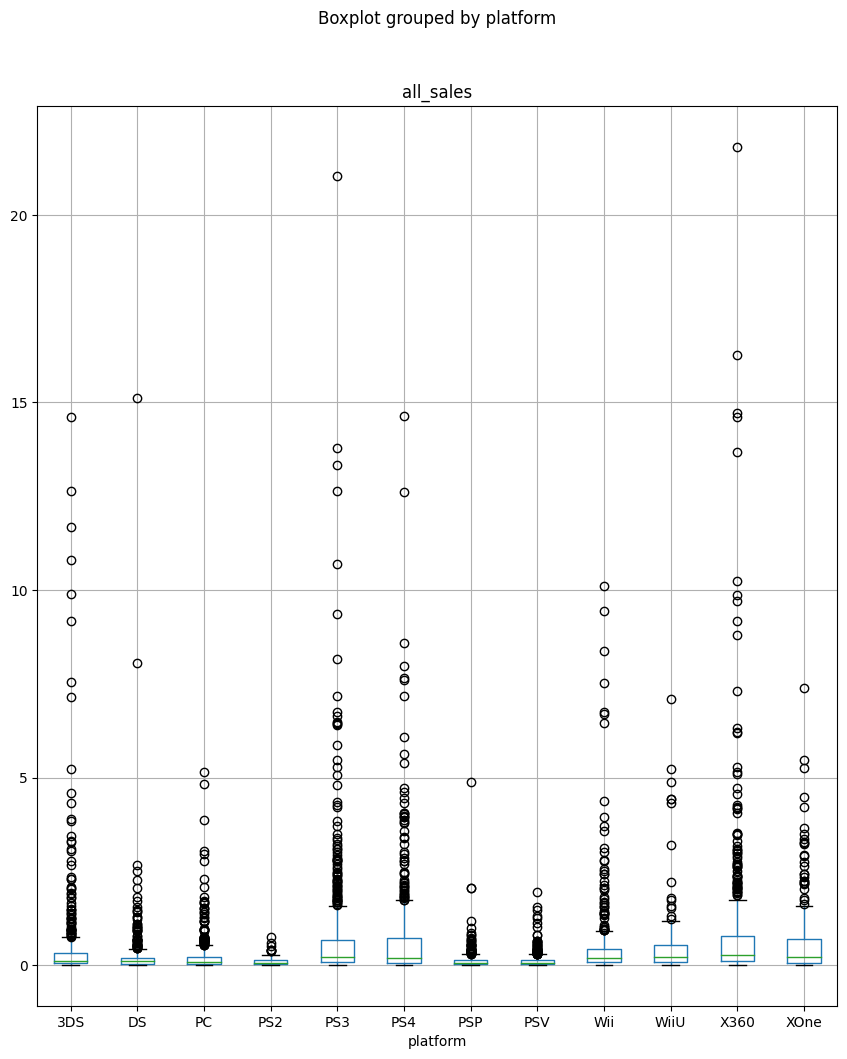

In [24]:
# не самый наглядый график, из-за выбросов сравнить боксплоты сложно
data_slice.boxplot(column='all_sales', by='platform', figsize=(10, 12));

(0.0, 10.0)

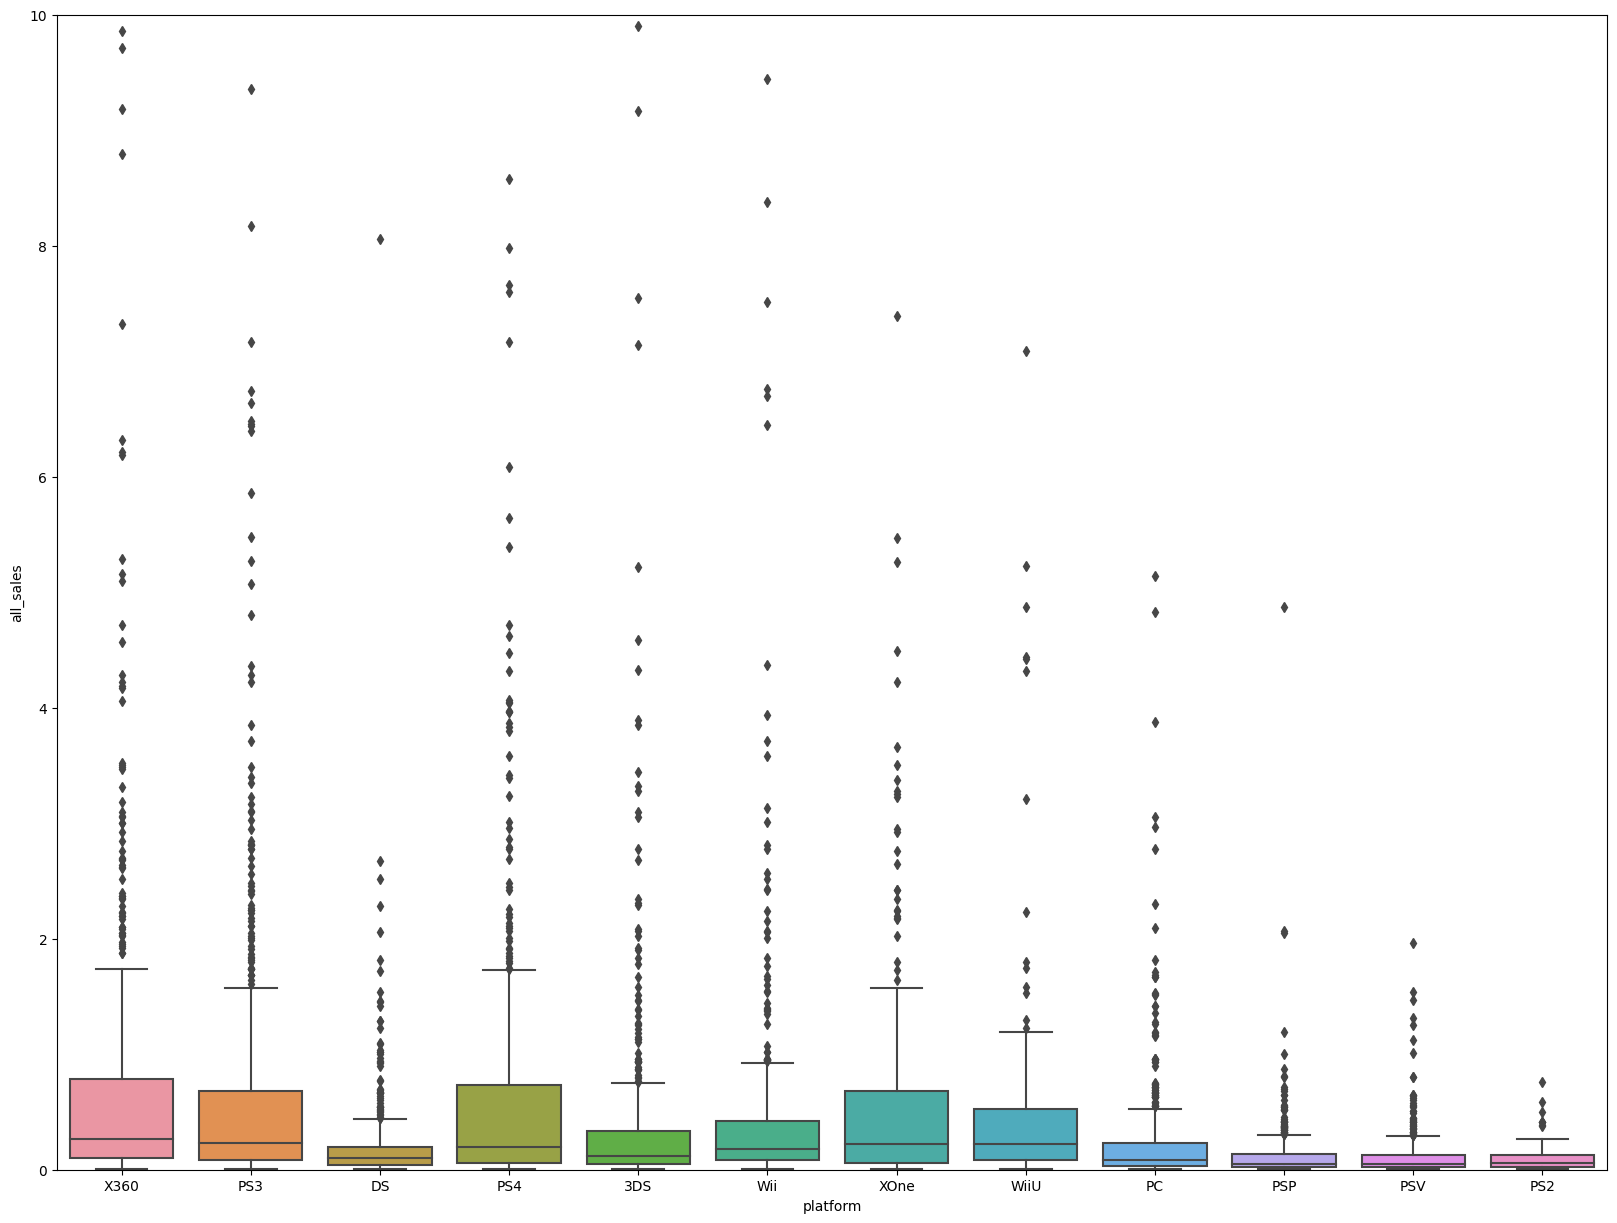

In [25]:
ax = plt.figure(figsize=(20,15))
ax = sns.boxplot(x="platform", y="all_sales", data=data_slice)
ax.set_ylim(0,10)

Разница в медиане у самых прибыльных платформ незначительна. Все платформы имеют выбросы. Самые большой размах у PS3, PS4, X360 и XOne

In [26]:
data_slice.groupby('platform')['all_sales'].median().sort_values(ascending=False)

platform
X360    0.27
PS3     0.23
WiiU    0.22
XOne    0.22
PS4     0.20
Wii     0.18
3DS     0.12
DS      0.10
PC      0.08
PS2     0.06
PSP     0.05
PSV     0.05
Name: all_sales, dtype: float64

In [27]:
data_slice.groupby('name')['all_sales'].sum().sort_values(ascending=False)

name
Grand Theft Auto V                    56.58
Call of Duty: Modern Warfare 3        30.60
Call of Duty: Black Ops II            29.40
Call of Duty: Black Ops               29.20
Call of Duty: Ghosts                  27.39
                                      ...  
Paranormal Pursuit: The Gifted One     0.01
Blood Bowl: Legendary Edition          0.01
Period Cube: Torikago no Amadeus       0.01
Pet Shop Monogatari DS 2               0.01
Ouka Sengoku Portable                  0.01
Name: all_sales, Length: 3282, dtype: float64

Серия игр CoD очень популярна и каждая игра серии показывает аномальный результат

In [28]:
data_slice[data_slice['name'] == 'Grand Theft Auto V' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
1729,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96,7.9,M,1.17


GTA V показывает аномальные результаты на всех платформах

In [29]:
data_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5277 non-null   object 
 1   platform         5277 non-null   object 
 2   year_of_release  5277 non-null   float64
 3   genre            5277 non-null   object 
 4   na_sales         5277 non-null   float64
 5   eu_sales         5277 non-null   float64
 6   jp_sales         5277 non-null   float64
 7   other_sales      5277 non-null   float64
 8   critic_score     5277 non-null   int64  
 9   user_score       5277 non-null   object 
 10  rating           5277 non-null   object 
 11  all_sales        5277 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 535.9+ KB


Сделаем срез данных для диаграммы рассеяния.

In [30]:
popular = data_slice[data_slice['user_score'] != 'tbd']
popular = popular[popular['critic_score'] != -1]

In [31]:
popular['user_score'] = popular['user_score'].astype('float64')

In [32]:
popularPS = popular[popular['platform'] == 'PS3']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


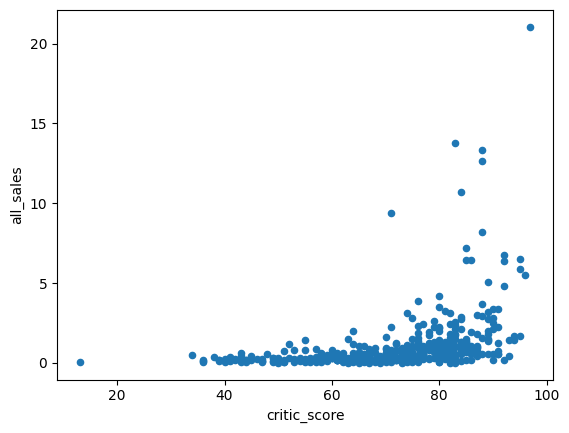

In [33]:
popularPS.plot(x='critic_score', y='all_sales', kind='scatter');

In [34]:
popularPS['all_sales'].corr(popularPS['critic_score'])

0.3936035470871841

Умеренная корреляция. Нельзя сказать, что высокие оценки гарантируют продажи, но вот низкие оценки, это всегда плохие продажи.


In [35]:

popularPS['user_score'] = popularPS['user_score'].astype('float64')

C:\Users\purfo\AppData\Local\Temp\ipykernel_17388\3458178894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularPS['user_score'] = popularPS['user_score'].astype('float64')


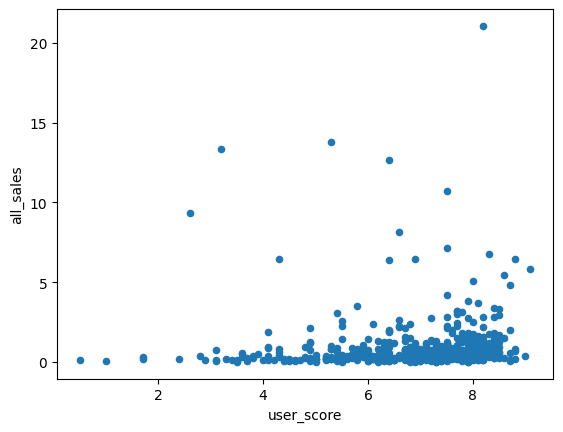

In [36]:
popularPS.plot(x='user_score', y='all_sales', kind='scatter') ;

In [37]:
popularPS['all_sales'].corr(popular['user_score'])

0.08273559916957511

Слабая корреляция, оценки пользоваталей не играют роль при выборе игры. 

Посмотрим на другие платформы

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


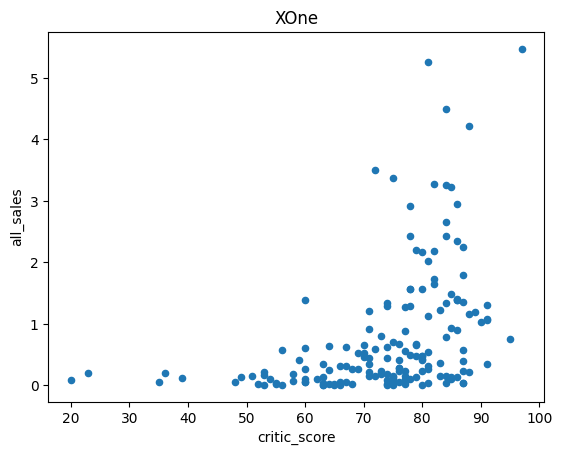

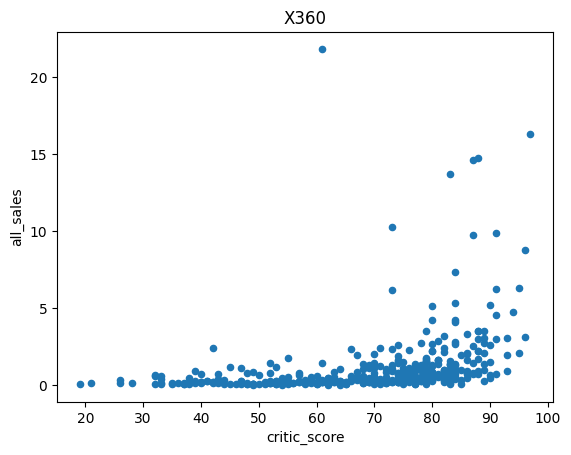

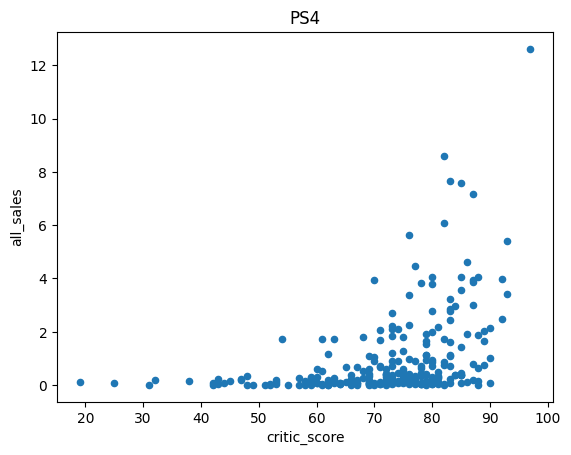

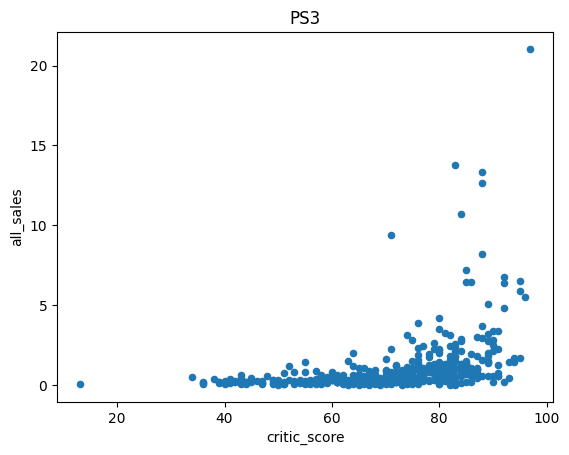

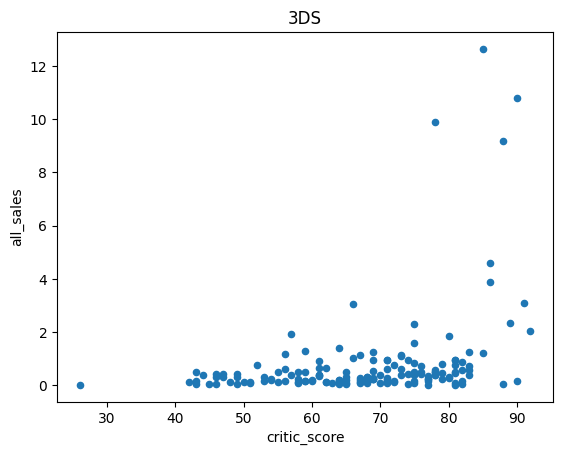

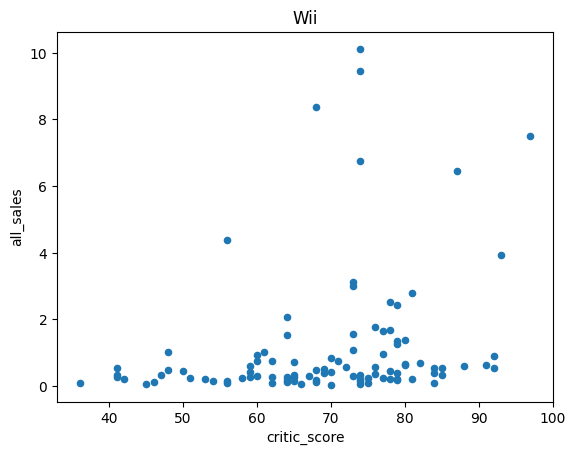

In [38]:
popular[popular['platform'] == 'XOne'].plot(x='critic_score', y='all_sales', kind='scatter',title='XOne');
popular[popular['platform'] == 'X360'].plot(x='critic_score', y='all_sales', kind='scatter', title='X360');
popular[popular['platform'] == 'PS4'].plot(x='critic_score', y='all_sales', kind='scatter', title='PS4');
popular[popular['platform'] == 'PS3'].plot(x='critic_score', y='all_sales', kind='scatter', title='PS3');
popular[popular['platform'] == '3DS'].plot(x='critic_score', y='all_sales', kind='scatter', title='3DS');
popular[popular['platform'] == 'Wii'].plot(x='critic_score', y='all_sales', kind='scatter', title='Wii');

In [39]:
print('Уровень кореляции XOne', popular[popular['platform'] == 'XOne'].corr().loc['all_sales','critic_score'])
print('Уровень кореляции X360', popular[popular['platform'] == 'X360'].corr().loc['all_sales','critic_score'])
print('Уровень кореляции PS4', popular[popular['platform'] == 'PS4'].corr().loc['all_sales','critic_score'])
print('Уровень кореляции PS3', popular[popular['platform'] == 'PS3'].corr().loc['all_sales','critic_score'])
print('Уровень кореляции 3DS', popular[popular['platform'] == '3DS'].corr().loc['all_sales','critic_score'])
print('Уровень кореляции Wii', popular[popular['platform'] == 'Wii'].corr().loc['all_sales','critic_score'])



Уровень кореляции XOne 0.4104220356129644
Уровень кореляции X360 0.3362802735839948
Уровень кореляции PS4 0.4058948014583663
Уровень кореляции PS3 0.39360354708718315
Уровень кореляции 3DS 0.33890386446332027
Уровень кореляции Wii 0.25493940851446467


Уровень корреляции умеренный, кроме wii. Видимо пользователи wii меньше интересуются оценками критиков. 

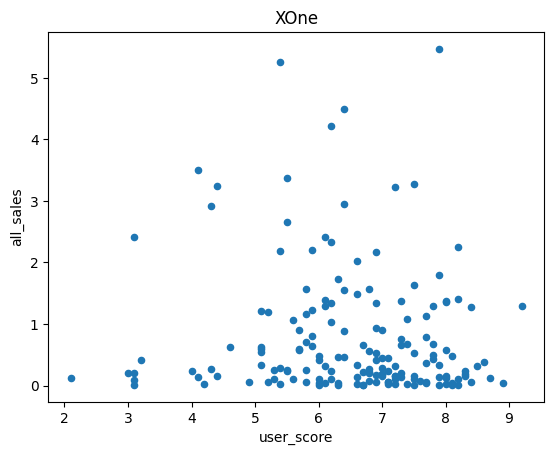

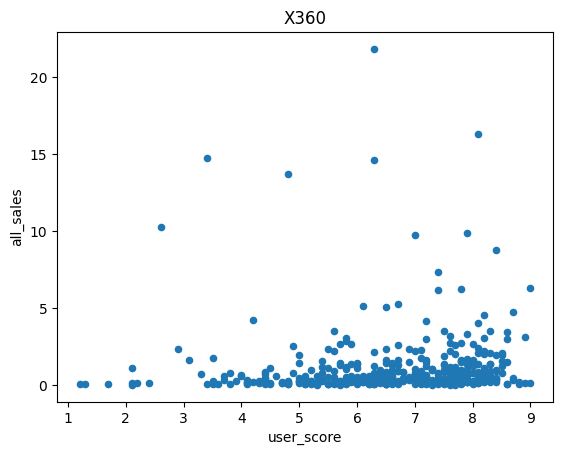

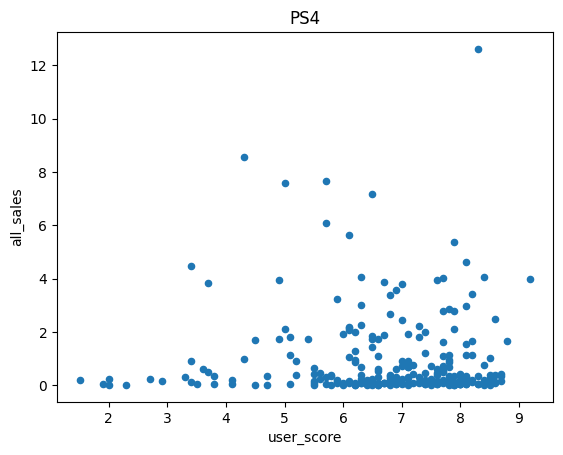

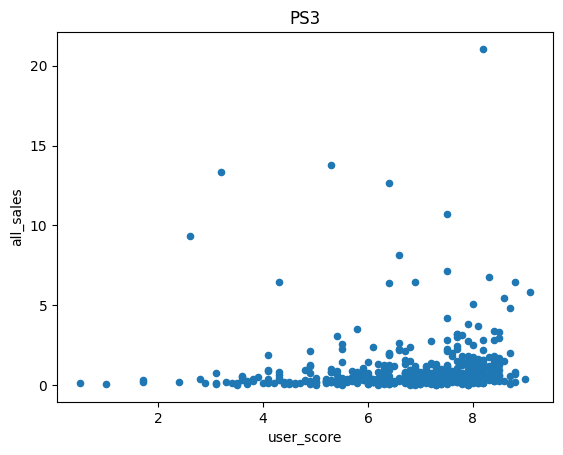

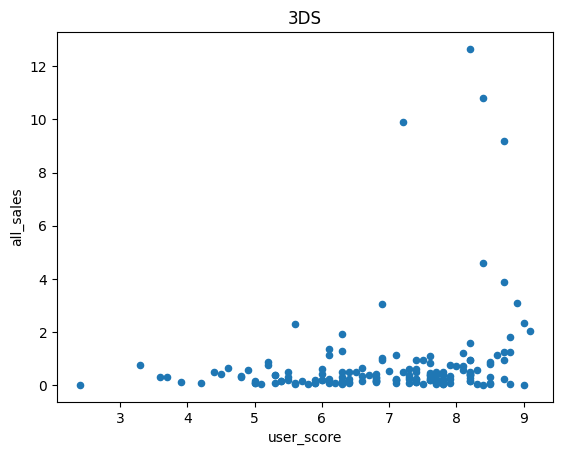

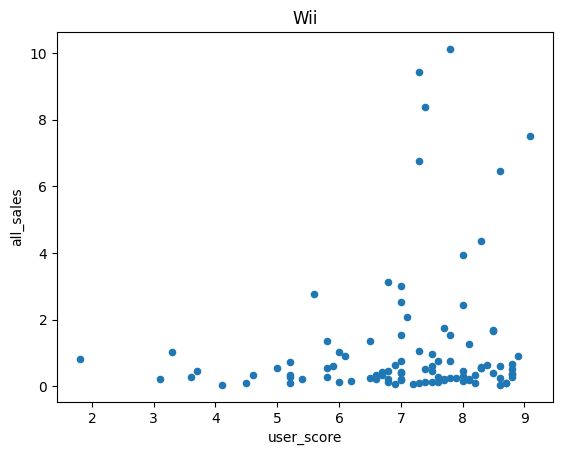

In [40]:
popular[popular['platform'] == 'XOne'].plot(x='user_score', y='all_sales', kind='scatter',title='XOne');
popular[popular['platform'] == 'X360'].plot(x='user_score', y='all_sales', kind='scatter', title='X360');
popular[popular['platform'] == 'PS4'].plot(x='user_score', y='all_sales', kind='scatter', title='PS4');
popular[popular['platform'] == 'PS3'].plot(x='user_score', y='all_sales', kind='scatter', title='PS3');
popular[popular['platform'] == '3DS'].plot(x='user_score', y='all_sales', kind='scatter', title='3DS');
popular[popular['platform'] == 'Wii'].plot(x='user_score', y='all_sales', kind='scatter', title='Wii');

In [41]:
print('Уровень кореляции XOne', popular[popular['platform'] == 'XOne'].corr().loc['all_sales','user_score'])
print('Уровень кореляции X360', popular[popular['platform'] == 'X360'].corr().loc['all_sales','user_score'])
print('Уровень кореляции PS4', popular[popular['platform'] == 'PS4'].corr().loc['all_sales','user_score'])
print('Уровень кореляции PS3', popular[popular['platform'] == 'PS3'].corr().loc['all_sales','user_score'])
print('Уровень кореляции 3DS', popular[popular['platform'] == '3DS'].corr().loc['all_sales','user_score'])
print('Уровень кореляции Wii', popular[popular['platform'] == 'Wii'].corr().loc['all_sales','user_score'])

Уровень кореляции XOne -0.09400318326920779
Уровень кореляции X360 0.055079102086011945
Уровень кореляции PS4 -0.03362497596528893
Уровень кореляции PS3 0.08273559916957503
Уровень кореляции 3DS 0.2320887223766364
Уровень кореляции Wii 0.1612774902251641


Низкий уровень корреляции, но возможно тут не линейная корреляция. 

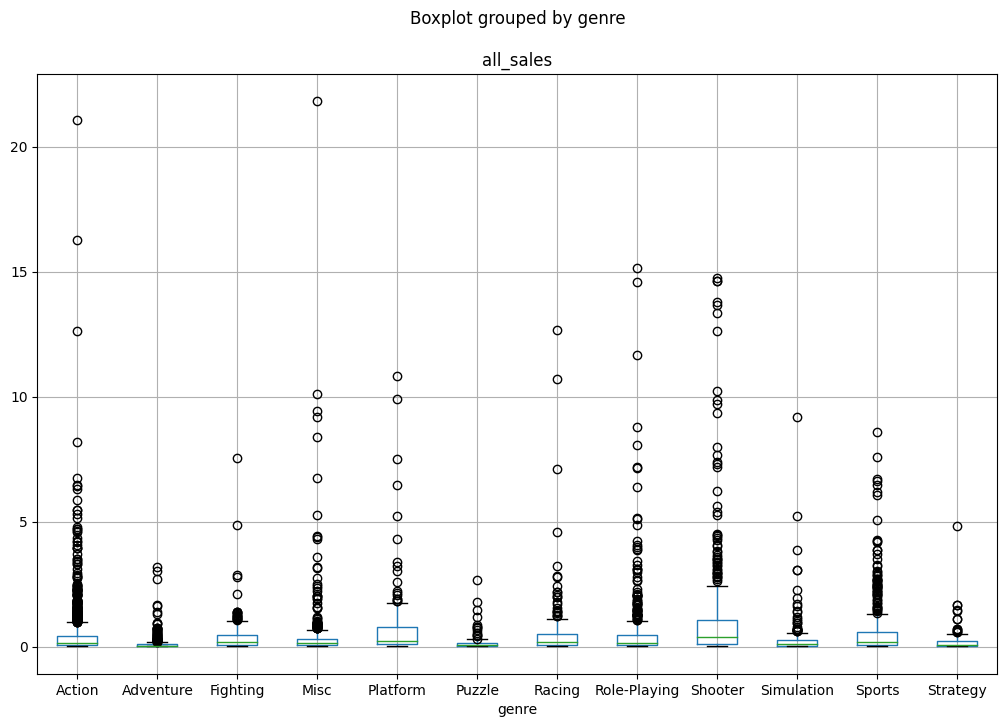

In [42]:
data_slice.boxplot(by='genre', column='all_sales', figsize=(12,8));

In [43]:
data_slice.groupby('genre').median()['all_sales'].sort_values(ascending=False)

genre
Shooter         0.385
Platform        0.210
Sports          0.200
Fighting        0.180
Racing          0.170
Role-Playing    0.150
Action          0.140
Misc            0.130
Simulation      0.100
Strategy        0.080
Puzzle          0.070
Adventure       0.030
Name: all_sales, dtype: float64

Самыми прибыльными жанрами являются: shooter, platform, sports. Shooter с сильным отрывом лидирут.  
Низкие продажы: adventure, puzzle, strategy. Adventure мало кому интересна. 

*Вывод по шагу:*
Мы изучили распределение игр по годам. Нашли самые прибыльные платформы за прошедшие года X360, PS3, WiiU, XOne. Определили актуальный период для анализа. Определили перспективные платформы(PS4, XOne, 3DS). Узнали как коррелируют оценка критиков и пользователей с продажами, больше прислушиваются к оценкам критиков. Самые популярными жанрами оказались shooter, platform и sports.

## ШАГ. Портреты пользователей каждого региона

Определим самые популярные платформы и жанры в NA.

In [44]:
na_popular_platform = data_slice.groupby('platform').mean()['na_sales'].sort_values(ascending=False).head(5)
na_popular_platform

platform
X360    0.491441
XOne    0.377004
PS4     0.277398
Wii     0.269333
WiiU    0.259184
Name: na_sales, dtype: float64

Американские платформы предсказуемо лидируют в америке, остальные платформы расположились довольно близко друг к другу. 

In [45]:
na_popular_genre = data_slice.groupby('genre').mean()['na_sales'].sort_values(ascending=False).head(5)
na_popular_genre

genre
Shooter         0.579195
Platform        0.358824
Sports          0.272713
Misc            0.214931
Role-Playing    0.197271
Name: na_sales, dtype: float64

Шутера и платформеры занимают основную часть продаж в NA. 

In [46]:
rna = data_slice.groupby('rating').sum()
rna['na_sales'].sort_values(ascending=False)

rating
M       382.22
E       271.15
T       160.81
E10+    159.38
-1      155.72
EC        1.13
RP        0.00
Name: na_sales, dtype: float64

Популярностью пользуются игры с рейтингом M (17+) и E (10+). Сложно сказать как влияет рейтинг на продажи из-за большого количества пропущенных данных. 

Проведем аналитику рынка Европы. 

In [47]:
eu_popular_platform = data_slice.groupby('platform').mean()['eu_sales'].sort_values(ascending=False).head(5)
eu_popular_platform

platform
PS4     0.359923
X360    0.240309
PS3     0.240270
XOne    0.208866
WiiU    0.170952
Name: eu_sales, dtype: float64

Американские платформы чуть-чуть уступают японским. 

In [48]:
eu_popular_genre = data_slice.groupby('genre').mean()['eu_sales'].sort_values(ascending=False).head(5)
eu_popular_genre

genre
Shooter     0.418171
Platform    0.250327
Racing      0.231013
Sports      0.203200
Action      0.156274
Name: eu_sales, dtype: float64

Шутера в EU менее популярны, чем в NA. Платформеры хорошо продаются и в Европе тоже. 

In [49]:
reu = data_slice.groupby('rating').sum()
reu['eu_sales'].sort_values(ascending=False)

rating
M       292.04
E       197.34
-1      139.44
T       113.08
E10+     99.28
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

Игры с рейтингом M самые популярные в EU. Много игр без рейтинга. 

Проведем аналитку платформ и жанров в JP. 

In [50]:
jp_popular_platform = data_slice.groupby('platform').mean()['jp_sales'].sort_values(ascending=False).head(5)
jp_popular_platform

platform
3DS     0.196523
WiiU    0.088503
PSP     0.084400
PS3     0.066659
DS      0.055030
Name: jp_sales, dtype: float64

В Японии популярны японские платформы. 3DS лидирует с отрывом. 

In [51]:
jp_popular_genre = data_slice.groupby('genre').mean()['jp_sales'].sort_values(ascending=False).head(5)
jp_popular_genre

genre
Role-Playing    0.182289
Platform        0.103333
Fighting        0.069849
Simulation      0.061290
Action          0.048294
Name: jp_sales, dtype: float64

В Японии распределение жанров более плавное, чем в других регионах. Шутера не попали в топ 5, а вот RP занимает большую долю рынка. 

In [52]:
rjp = data_slice.groupby('rating').sum()
rjp['jp_sales'].sort_values(ascending=False)

rating
-1      171.49
E        47.87
T        42.11
M        30.45
E10+     13.22
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64

У японских игр нет оценки от ESRB, мы думаем это связано с тем, что ESRB американская компания, а Япония делает игры для внутреннего рынка и им этот рейтинг не нужен. 

Круговые диаграммы по платформам:

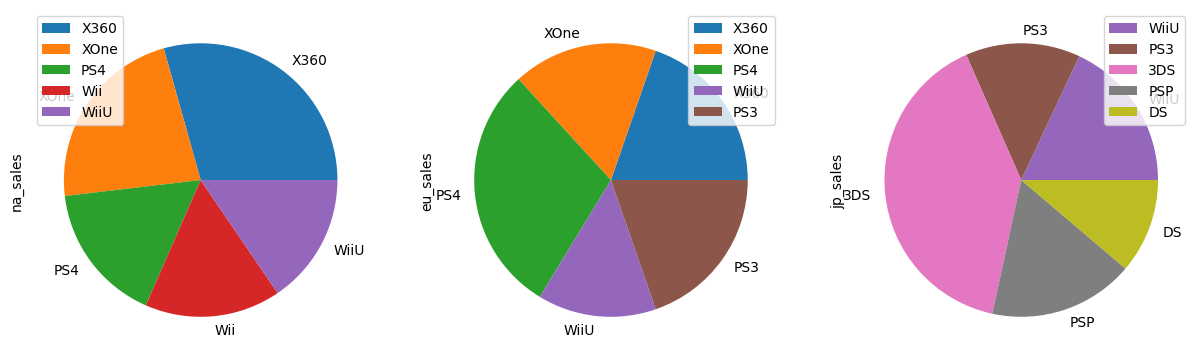

In [53]:
all_platform = pd.DataFrame(data=[na_popular_platform, eu_popular_platform, jp_popular_platform]).T
plot = all_platform.plot.pie(subplots=True, figsize=(15, 8))

Круговые диаграммы по жанрам:

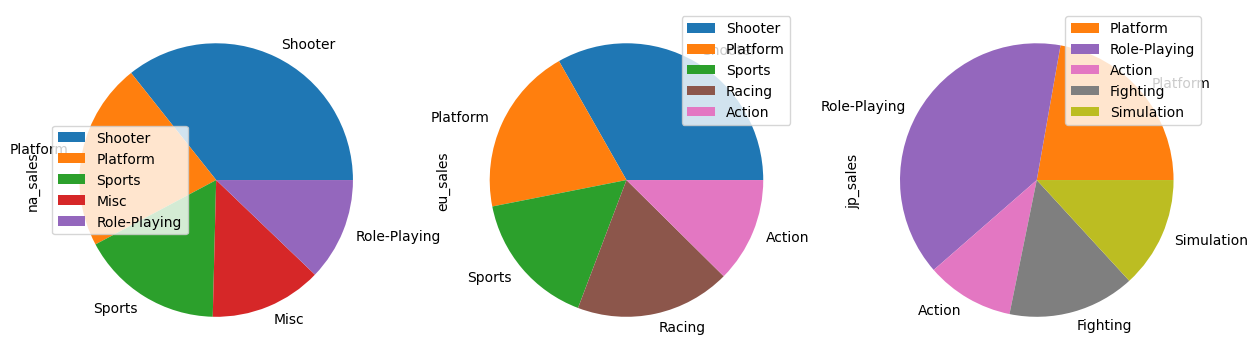

In [54]:
all_genre = pd.DataFrame(data=[na_popular_genre, eu_popular_genre, jp_popular_genre]).T
plot_genre = all_genre.plot.pie(subplots=True, figsize=(15, 8))

Круговые диаграммы по рейтингу:

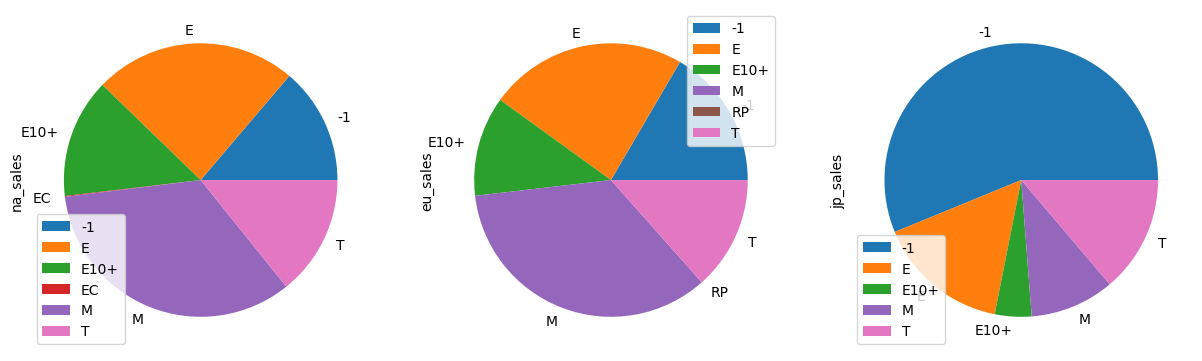

In [55]:
all_rating = pd.DataFrame(data=[rna['na_sales'], reu['eu_sales'], rjp['jp_sales']]).T
plot_rating = all_rating.plot.pie(subplots=True, figsize=(15, 8))

*Вывод по шагу:*   
В NA предпочитают xbox и шутеры для взрослых. В Европе PS чуть популярнее xbox и играют в шутеры, и в платформеры. В Японии популярные японские платформы, играют чаще в RP и платформеры, большенство японских игр не имеют рейтинг ESRB.

## Шаг. Проверка гипотез

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
```
H_0: Средний рейтинг (user_score)  "XOne" = Средний рейтинг (user_score)  "PC"`
H_a: Средний рейтинг (user_score)  "XOne" ≠ Средний рейтинг (user_score)  "PC"`
alpha = 0.05
```

In [56]:
xone = data_slice[data_slice['platform'] == 'XOne']
pc = data_slice[data_slice['platform'] == 'PC']

In [57]:
# вероятно надо было ещё на предобработке убрать tbd...
xone.loc[xone.user_score=='tbd', 'user_score'] = np.nan
pc.loc[pc.user_score=='tbd', 'user_score'] = np.nan

In [58]:
xone = xone['user_score'].dropna().astype('float')
pc = pc['user_score'].dropna().astype('float')

In [59]:
results = st.ttest_ind(xone, pc, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
```
H_0: Средний рейтинг (user_score)  "Action" = Средний рейтинг (user_score)  "Sports"`
H_a: Средний рейтинг (user_score)  "Action" ≠ Средний рейтинг (user_score)  "Sports"`
alpha = 0.05
```

In [60]:
action = data_slice[data_slice['genre'] == 'Action']
sports = data_slice[data_slice['genre'] == 'Sports']

In [61]:
action.loc[action.user_score=='tbd', 'user_score'] = np.nan
sports.loc[sports.user_score=='tbd', 'user_score'] = np.nan

In [62]:
action = action['user_score'].dropna().astype('float')
sports = sports['user_score'].dropna().astype('float')

In [63]:
results = st.ttest_ind(action, sports, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.451615246784441e-15
Отвергаем нулевую гипотезу


*Как вы сформулировали нулевую и альтернативную гипотезы?*  
В нулевой гипотезе обычно предполагается, что различий в выборках нет, поэтому стоит условие '='. В Альтернативной гипотезе предполагаются различия в выборках, условия: !=, >, <.

*Какой критерий применили для проверки гипотез и почему?*  
 t-критерий Стьюдента (независимые выборки)

## Шаг. Общий вывод: 

Мы получили в датасет, в котором доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мы смогли выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
*Первые шаги:* Мы изучили и подготовили данные к исследовательскому анализу. 

*Исследовательский анализ:* Мы посмотрели сколько игр выпускалось в разные годы. Узнали как менялись продажи по платформам. Нашли платформы с наибольшими суммарными продажами и построили график с распределением по годам. Выяснили какой характерный срок появляются новые (каждые 5 лет) и исчезают старые платформы (каждые 10 лет, за исключение PC).  
Определили актуальный период. на основе этих данных построим прогноз на 2017 год.  
Выбрали несколько потенциально прибыльных платформ:
1. PS4
2. Xbox One
3. 3DS

Мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
По результатам:  
1. Разница в медиане у самых прибыльных платформ не значительна  
2. Все платформы имеют выбросы  
3. Самые большой размах у PS3, PS4, X360 и XOne

Мы посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Получили такие выводы:  
1. Для большинства платформ заметна положительная корреляция между оценкой критиков и суммарным количеством продаж  
2. Высокие оценки не всегда гарантируют продажи, но вот низкие оценки, это всегда плохие продажи.
3. Между количеством продаж и оценками пользователей нет прямой корреляции.  

Мы изучили общее распределение игр по жанрам. Самым прибыльным жанром можно назвать шутер(shooter). Выделить жанры с высокими и низкими продажами сложно, так как медиана продаж примерно схожа.

*Составили портрет пользователя каждого региона*  
*Пользователи из NA* : Предпочитают xbox, шутеры с рейтингом 17+  
*Пользователи из EU* : Используют и xbox, и PS. Играют не только в шутеры, но и в платформеры, и в гонки.  
*Пользователи из NA* : Играют в основном с японских платформ, популярна 3DS, жанры предпочитают RP и платформеры

Мы проверили гипотезы и получили, что: 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

*Рекомендации для компании:* обратить внимание на PS4, Xbox One и 3DS при планировании рекламной кампании. На успешность игр больше влияет оценка критиков, чем оценка пользователей. Присмотреться к платформе PC, так как она будет ещё долго на плаву. Самым прибыльными жанрами можно назвать шутеры и платформеры. 

*Рекомендации для дальнейшего анализа:* Выяснить игр каких жанров больше производят, возможно это шутеры. У каких жанров больше user_score и critic_score. Выяснить почему у половины игр японского рынка нет оценки ESRB, вероятно их не продают за границу. 